# hubble/fits

using [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/)

In [39]:
import os
import math
import numpy as np
import cv2
from astropy.io import fits
from abcli import file
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
import matplotlib.pyplot as plt
from hubble import NAME, VERSION

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}.{VERSION}.{fullname()}, built on {string.pretty_date()}")

hubble.3.10.1.abcli-7.2325.1-unknown, built on 12 September 2023, 20:10:28


In [ ]:
object_name = "hubble-download-val-2023-09-10-v5"

In [ ]:
!echo $abcli_object_root

In [ ]:
HOME=os.getenv("HOME")
%env abcli_object_name={object_name}
%env abcli_object_root={HOME}/storage/abcli
%env abcli_object_path={HOME}/storage/abcli/{object_name}

In [ ]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli download

---

In [ ]:
filename = [filename for filename in objects.list_of_files(object_name) if file.extension(filename) == "fits"][0]
logger.info(f"filename:{filename}")

In [ ]:
with fits.open(filename) as hdul:
    hdul.info()
    logger.info(f"{len(hdul)} item(s)")

    images = [item.data for item in hdul if item.data is not None]
    logger.info(f"{len(images)} image(s)")


In [35]:
np.max(images[0])

36461.76

image #0: -1.999 - 6.050


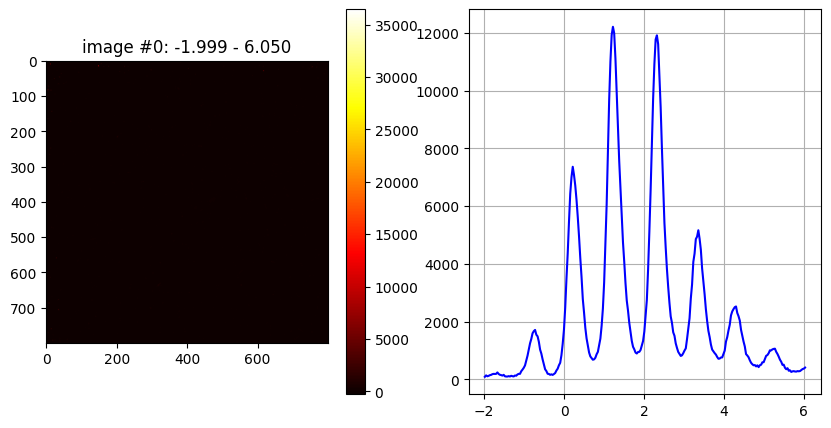

In [47]:
cmap = "hot"

index = 0
margin = 5

vmin = np.percentile(images[index], margin)
vmax = np.percentile(images[index], 100 - margin)

description = f"image #{index}: {vmin:.3f} - {vmax:.3f}"
logger.info(description)

histogram, bin_edges = np.histogram(images[index], bins=256, range=(vmin,vmax))

bins = (bin_edges[:-1] + bin_edges[1:]) / 2 

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(images[index], cmap=cmap, vmin=vmin, vmax=vmax) 
plt.colorbar(cmap=cmap)
plt.title(description)
plt.subplot(122)
plt.plot(bins, histogram, color='b')
plt.grid(True)
plt.show()

---

In [ ]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

In [ ]:
seed.log("download_object")

In [ ]:
# END